In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.ALMApy import run_alma, change_param
import matplotlib.cm as cm
import matplotlib.colors as mcolors

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Serif"
})

In [3]:
G = 6.67e-11

R_earth = 6.371e6
M_earth = 5.972e24

rho_earth = M_earth/(4*np.pi/3*R_earth**3)
rigidity_earth = 1e11
viscosity_earth = 1e21
print(rho_earth)
g_earth = G*M_earth/R_earth**2


yr = 365.24*24*3600
kyrs = 1e3*yr

5513.258738589093


In [16]:
change_param("time_points_minus_one", 10)
t, k = run_alma(R_earth, rho_earth, rigidity_earth, viscosity_earth, "maxwell")
change_param("time_points_minus_one", 2)
t = np.array(t)*1000

Running ALMA3...
Done running!


In [5]:
def k_an(t):
    gamma2 = 19/2*rigidity_earth/(rho_earth*g_earth*R_earth)
    tau = viscosity_earth/rigidity_earth
    tau_prime = (1+gamma2)*tau
    return 3/2/(1+gamma2)*(1+gamma2*(1-np.exp(-t/tau_prime)))#3/2/(1+gamma2)*(1/tau-1/tau_prime)*np.exp(-t/tau_prime)

def k_an2(t, R, rho, rigidity, viscosity):
    g = G*4*np.pi/3*rho*R
    gamma2 = 19/2*rigidity/(rho*g*R)
    tau = viscosity/rigidity
    tau_prime = (1+gamma2)*tau
    return 3/2/(1+gamma2)*(1+gamma2*(1-np.exp(-t/tau_prime)))#3/2/(1+gamma2)*(1/tau-1/tau_prime)*np.exp(-t/tau_prime)

/tmp/ipykernel_2155/3578088414.py:20: RuntimeWarning: divide by zero encountered in divide
  ax2 = ax.secondary_xaxis("top", (lambda x:2*np.pi/x, lambda x: 2*np.pi/x))


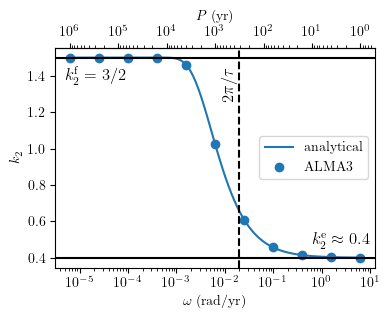

In [6]:
gamma2 = 19/2*rigidity_earth/(rho_earth*g_earth*R_earth)
tau = viscosity_earth/rigidity_earth
tau_prime = (1+gamma2)*tau

t_interp = np.logspace(0,6,100)

fig, ax = plt.subplots(figsize=(4,3.3))
ax.plot(2*np.pi/t_interp,k_an(t_interp*yr), label="analytical")
ax.scatter(2*np.pi/t,k,color="C0", label="ALMA3")

ax.axhline(3/2, color="black")
ax.text(5e-6, 1.45, "$k_2^\\mathrm{f}=3/2$", fontsize=12, color="black", verticalalignment="top", horizontalalignment="left")

ax.axvline(2*np.pi/(tau/yr), color="black", linestyle="dashed")
ax.text(2*np.pi/(tau/yr)*0.9, 1.25, r"$2\pi/\tau$", fontsize=12, rotation=90, verticalalignment="bottom", horizontalalignment="right")

ax.axhline(3/2/(1+gamma2), color="black")
ax.text(1e1, 0.45, "$k_2^\\mathrm{e}\\approx 0.4$", fontsize=12, color="black", verticalalignment="bottom", horizontalalignment="right")

ax2 = ax.secondary_xaxis("top", (lambda x:2*np.pi/x, lambda x: 2*np.pi/x))
ax2.set_xlabel(r"$P$ (yr)")

ax.set_xscale("log")
ax.set_xlabel(r"$\omega$ (rad/yr)")
ax.set_ylabel(r"$k_2$")
ax.legend()
fig.tight_layout()
fig.savefig("figures/report/k2_vs_omega.pdf")
plt.show()

In [13]:
change_param("time_points_minus_one", 10)
t_2R, k_2R = run_alma(2*R_earth, rho_earth, rigidity_earth, viscosity_earth, "maxwell")
change_param("time_points_minus_one", 2)
t_2R = np.array(t_2R)*1000

change_param("time_points_minus_one", 10)
t_2rho, k_2rho = run_alma(R_earth, 2*rho_earth, rigidity_earth, viscosity_earth, "maxwell")
change_param("time_points_minus_one", 2)
t_2rho = np.array(t_2rho)*1000

change_param("time_points_minus_one", 10)
t_2rig, k_2rig = run_alma(R_earth, rho_earth, 2*rigidity_earth, viscosity_earth, "maxwell")
change_param("time_points_minus_one", 2)
t_2rig = np.array(t_2rig)*1000

change_param("time_points_minus_one", 10)
t_2visc, k_2visc = run_alma(R_earth, rho_earth, rigidity_earth, 2*viscosity_earth, "maxwell")
change_param("time_points_minus_one", 2)
t_2visc = np.array(t_2visc)*1000

Running ALMA3...
Done running!
Running ALMA3...
Done running!
Running ALMA3...
Done running!
Running ALMA3...
Done running!


/tmp/ipykernel_2155/1274152413.py:26: RuntimeWarning: divide by zero encountered in divide
  ax2 = ax.secondary_xaxis("top", (lambda x:2*np.pi/(x), lambda x: 2*np.pi/(x)))


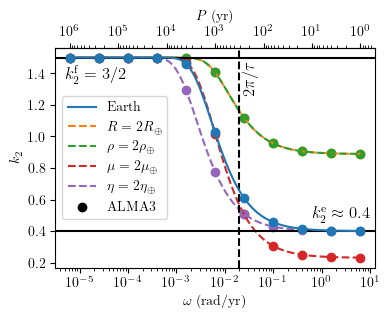

In [24]:
#t_interp = np.logspace(-3,3,100)*kyrs

fig, ax = plt.subplots(figsize=(4,3.3))
ax.plot(2*np.pi/t_interp,k_an(t_interp*yr), zorder=100,label="Earth")
ax.scatter(2*np.pi/t, k, zorder=100, color="C0")
ax.plot(2*np.pi/t_interp, k_an2(t_interp*yr, 2*R_earth, rho_earth, rigidity_earth, viscosity_earth), linestyle="--", label=r"$R=2R_\oplus$")
ax.scatter(2*np.pi/t_2R, k_2R, color="C1")
ax.plot(2*np.pi/t_interp[1:], k_an2(t_interp[1:]*yr, R_earth, 2*rho_earth, rigidity_earth, viscosity_earth), linestyle="--", label=r"$\rho=2\rho_\oplus$")
ax.scatter(2*np.pi/t_2rho, k_2rho, color="C2")
ax.plot(2*np.pi/t_interp, k_an2(t_interp*yr, R_earth, rho_earth, 2*rigidity_earth, viscosity_earth), linestyle="--", label=r"$\mu=2\mu_\oplus$")
ax.scatter(2*np.pi/t_2rig, k_2rig, color="C3")
ax.plot(2*np.pi/t_interp, k_an2(t_interp*yr, R_earth, rho_earth, rigidity_earth, 2*viscosity_earth), linestyle="--", label=r"$\eta=2\eta_\oplus$")
ax.scatter(2*np.pi/t_2visc, k_2visc, color="C4")

ax.axhline(3/2, color="black")
ax.text(5e-6, 1.45, "$k_2^\\mathrm{f}=3/2$", fontsize=12, color="black", verticalalignment="top", horizontalalignment="left")

ax.axvline(2*np.pi/(tau/yr), color="black", linestyle="dashed")
ax.text(2*np.pi/(tau/yr)*1.1, 1.25, r"$2\pi/\tau$", fontsize=12, rotation=90, verticalalignment="bottom", horizontalalignment="left")

ax.axhline(3/2/(1+gamma2), color="black")
ax.text(1e1, 0.45, "$k_2^\\mathrm{e}\\approx 0.4$", fontsize=12, color="black", verticalalignment="bottom", horizontalalignment="right")

ax.scatter([],[],color="black",label="ALMA3")

ax2 = ax.secondary_xaxis("top", (lambda x:2*np.pi/(x), lambda x: 2*np.pi/(x)))
ax2.set_xlabel(r"$P$ (yr)")

ax.set_xscale("log")
ax.set_xlabel(r"$\omega$ (rad/yr)")
ax.set_ylabel(r"$k_2$")
ax.legend()
fig.tight_layout()
fig.savefig("figures/report/k2_vs_omega_params.pdf")
plt.show()

/tmp/ipykernel_2155/1374494221.py:11: RuntimeWarning: divide by zero encountered in divide
  ax2 = ax.secondary_xaxis("top", (lambda x:2*np.pi/(x), lambda x: 2*np.pi/(x)))


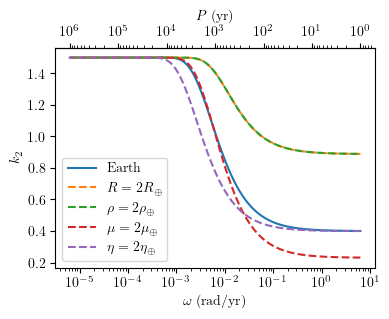

In [9]:
#t_interp = np.logspace(-3,3,100)*kyrs

fig, ax = plt.subplots(figsize=(4,3.3))
ax.plot(2*np.pi/t_interp,k_an(t_interp*yr), label="Earth")
ax.plot(2*np.pi/t_interp, k_an2(t_interp*yr, 2*R_earth, rho_earth, rigidity_earth, viscosity_earth), linestyle="--", label=r"$R=2R_\oplus$")
ax.plot(2*np.pi/t_interp[1:], k_an2(t_interp[1:]*yr, R_earth, 2*rho_earth, rigidity_earth, viscosity_earth), linestyle="--", label=r"$\rho=2\rho_\oplus$")
ax.plot(2*np.pi/t_interp, k_an2(t_interp*yr, R_earth, rho_earth, 2*rigidity_earth, viscosity_earth), linestyle="--", label=r"$\mu=2\mu_\oplus$")
ax.plot(2*np.pi/t_interp, k_an2(t_interp*yr, R_earth, rho_earth, rigidity_earth, 2*viscosity_earth), linestyle="--", label=r"$\eta=2\eta_\oplus$")


ax2 = ax.secondary_xaxis("top", (lambda x:2*np.pi/(x), lambda x: 2*np.pi/(x)))
ax2.set_xlabel(r"$P$ (yr)")

ax.set_xscale("log")
ax.set_xlabel(r"$\omega$ (rad/yr)")
ax.set_ylabel(r"$k_2$")
ax.legend()
fig.tight_layout()
fig.savefig("figures/report/k2_vs_omega_params.pdf")
plt.show()

In [10]:
R_jupiter = 69.9e6
rho_air = 1.293
rigidity_air = 1e-7
viscosity_air = 3e-5
viscosity_earth = 1e21

t0, k0 = run_alma(R_earth, rho_earth, rigidity_earth, viscosity_earth, "maxwell")
t0 = np.array(t0)*1000
t001, k001 = run_alma([R_earth*1.1,R_earth], [rho_air,rho_earth], [rigidity_air,rigidity_earth], [viscosity_air,viscosity_earth], ["newton","maxwell"])
t001 = np.array(t001)*1000
t01, k01 = run_alma([R_earth*2,R_earth], [rho_air,rho_earth], [rigidity_air,rigidity_earth], [viscosity_air,viscosity_earth], ["newton","maxwell"])
t01 = np.array(t01)*1000
t05, k05 = run_alma([R_jupiter/2,R_earth], [rho_air,rho_earth], [rigidity_air,rigidity_earth], [viscosity_air,viscosity_earth], ["newton","maxwell"])
t05 = np.array(t05)*1000
t1, k1 = run_alma([R_jupiter,R_earth], [rho_air,rho_earth], [rigidity_air,rigidity_earth], [viscosity_air,viscosity_earth], ["newton","maxwell"])
t1 = np.array(t1)*1000



Running ALMA3...
Done running!
Running ALMA3...
Done running!
Running ALMA3...
Done running!
Running ALMA3...
Done running!
Running ALMA3...
Done running!


In [11]:
no_R_atm = 10
R_atms = np.logspace(np.log10(R_earth), np.log10(3*R_jupiter), 10)
#R_atms = np.linspace(R_earth, R_jupiter, 10)
ts = []
ks = []

change_param("time_points_minus_one", 10)
for i in range(no_R_atm):
    t,k =  run_alma([R_atms[i],R_earth], [rho_air,rho_earth], [rigidity_air,rigidity_earth], [viscosity_air,viscosity_earth], ["newton","maxwell"], show_start_stop=False)
    t = np.array(t)
    ts.append(t)
    ks.append(k)
    print(f"{i+1} of {no_R_atm}")
change_param("time_points_minus_one", 2)



1 of 10
2 of 10
3 of 10
4 of 10
5 of 10
6 of 10
7 of 10
8 of 10
9 of 10
10 of 10


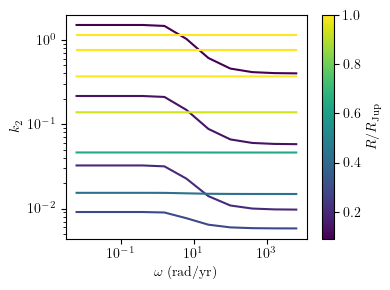

In [12]:
norm = mcolors.Normalize(vmin=R_earth/R_jupiter, vmax=1)
cmap = cm.viridis

fig, ax = plt.subplots(figsize=(4,3))
for i in range(no_R_atm):
    ax.plot(2*np.pi/ts[i],ks[i], color=cmap(norm(R_atms[i]/R_jupiter)))
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(r"$R/R_\mathrm{Jup}$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$\omega$ (rad/yr)")
ax.set_ylabel(r"$k_2$")
fig.tight_layout()
plt.show()